In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data bfro_reports_geogoded.csv. This is the combined data which has the states and classifcation. 
bf_geocode= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')

In [4]:
# Display the first few rows
print(bf_geocode.head())

#Removing the other columnns I do not need
bf_geocode = bf_geocode[['state', 'classification']]

#Checking to see the dataset
print(bf_geocode.head())

                                            observed  \
0  I am not sure how relevant this report will be...   
1  I don't know if what I saw was two bigfoots or...   
2  My family and I went to Ludlow, Vermont for Co...   
3  It was spring break 1984 and I was 16 at the t...   
4  It was the winter of 1996 and we were on our w...   

                                    location_details           county  \
0  We were on our way to Rapid City, so we were h...  Washakie County   
1  Heading to the deep mine Poca #2, the airshaft...   Wyoming County   
2  It's off Rt 100 outside of Ludlow Vermont. It ...   Windsor County   
3  Wythe county Virginia near Wytheville, looking...     Wythe County   
4  Hwy 182, Wood County Between Quitman, Texas an...      Wood County   

           state  season                                              title  \
0        Wyoming  Summer                                                NaN   
1  West Virginia  Winter  Report 13237: Daylight sighting near an 

In [5]:
# Get the unique states in the 'state' column
unique_states = bf_geocode['state'].unique()

print(unique_states) #checking if the states are spelled correctly 
      

['Wyoming' 'West Virginia' 'Vermont' 'Virginia' 'Texas' 'Tennessee'
 'South Carolina' 'Rhode Island' 'Pennsylvania' 'Oregon' 'Oklahoma' 'Ohio'
 'New York' 'Utah' 'Washington' 'Wisconsin' 'South Dakota' 'Nevada'
 'New Jersey' 'New Hampshire' 'Nebraska' 'North Dakota' 'New Mexico'
 'North Carolina' 'Montana' 'Mississippi' 'Missouri' 'Minnesota'
 'Michigan' 'Maine' 'Maryland' 'Massachusetts' 'Louisiana' 'Kentucky'
 'Kansas' 'Indiana' 'Illinois' 'Idaho' 'Georgia' 'Iowa' 'Florida'
 'Delaware' 'Connecticut' 'California' 'Arizona' 'Arkansas' 'Alabama'
 'Alaska' 'Colorado']


In [6]:
# Define regions by state
west_states = ['Alaska', 'Arizona', 'California', 'Hawaii', 'Idaho','Colorado', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Oregon', 'Washington', 'Wyoming']
midwest_states = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
south_states = ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia','Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
north_east_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

def assign_region(state):
    if state in west_states:
        return 'West'
    elif state in midwest_states:
        return 'Midwest'
    elif state in south_states:
        return 'South'
    elif state in north_east_states:
        return 'Northeast'
    else:
        return 'Other'


In [7]:
#Create another column called region
bf_geocode['region'] = bf_geocode['state'].apply(assign_region)

# Display the first few rows to verify
print(bf_geocode.head())

           state classification     region
0        Wyoming        Class B       West
1  West Virginia        Class A      South
2        Vermont        Class A  Northeast
3       Virginia        Class A      South
4          Texas        Class A      South


In [8]:
#Check to see how many rows there are
total_states = bf_geocode['state'].shape[0]

print("Total number of entries in the 'state' column:", total_states)

#Check to see how many rows there are in 'region' column
total_region = bf_geocode['region'].shape[0]

print("Total number of entries in the 'region' column:", total_region)

Total number of entries in the 'state' column: 5082
Total number of entries in the 'region' column: 5082


In [9]:
#Total number of sightings in each region
print(bf_geocode['region'].value_counts())

#As well check to see if there is any categorized as 'other'

region
West         1797
South        1594
Midwest      1292
Northeast     399
Name: count, dtype: int64


In [10]:
# Count sightings by region and classification
region_classification_counts = bf_geocode.groupby(['region', 'classification']).size()

# Display the result
print(region_classification_counts)

region     classification
Midwest    Class A           641
           Class B           645
           Class C             6
Northeast  Class A           179
           Class B           219
           Class C             1
South      Class A           885
           Class B           699
           Class C            10
West       Class A           797
           Class B           987
           Class C            13
dtype: int64


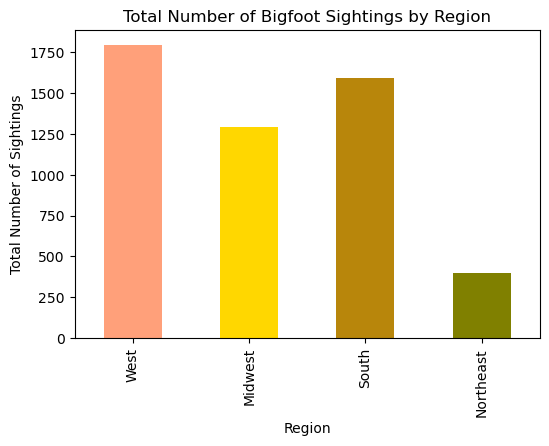

In [13]:
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame
region_classification_df =region_classification_counts.reset_index(name='count')

# Sum the counts for each region
total_sightings_by_region =region_classification_df.groupby('region')['count'].sum()

# Define the desired order of regions
desired_order =['West','Midwest','South','Northeast']

# Reorder the DataFrame according to the desired order
total_sightings_by_region =total_sightings_by_region.reindex(desired_order)

colors = {
    'West': 'lightsalmon',      
    'Midwest': 'gold',   
    'South': 'darkgoldenrod',
    'Northeast': 'olive'  #colors to match the CDC region map 
}

# Create the bar chart with region-specific colors
total_sightings_by_region.plot(kind='bar', figsize=(6, 4), color=[colors[region] for region in total_sightings_by_region.index])

# Add titles and labels
plt.title('Total Number of Bigfoot Sightings by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Sightings')

# Save the plot as an image file
plt.savefig('bigfoot_regions_US.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

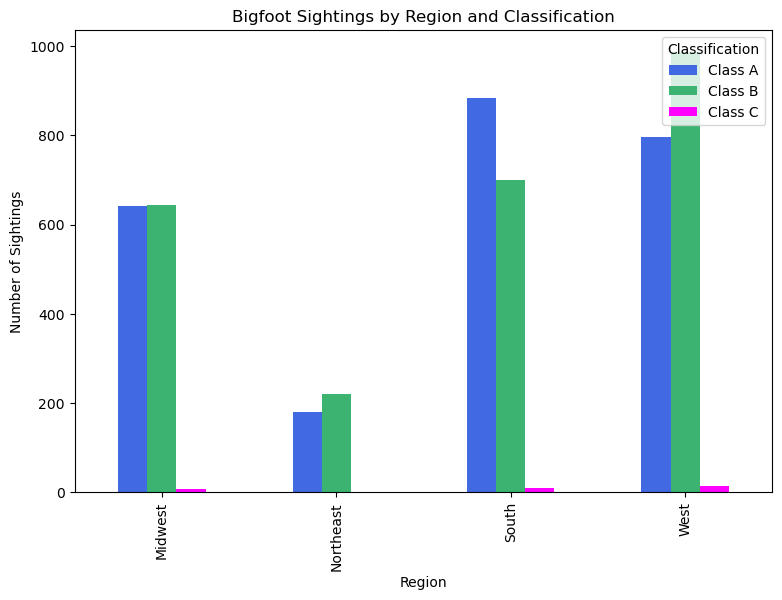

In [ ]:
# Define colors for each classification
classification_colors = ['royalblue', 'mediumseagreen', 'fuchsia']

# Pivot the DataFrame so that classifications become columns
pivot_df = region_classification_df.pivot(index='region', columns='classification', values='count').fillna(0)

# Create the grouped bar chart
pivot_df.plot(kind='bar', figsize=(9, 6), color=classification_colors)

# Add titles and labels
plt.title('Bigfoot Sightings by Region and Classification')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.legend(title='Classification', loc='upper right')

# Save the plot as an image file
plt.savefig('bigfoot_region_classification.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()